# Breast Cancer synthetic data
## Part 1. Exploratory Data Analysis

#### by Grzegorz Furdyn

## Contents

#### CRISP-DM Phase 1: Business Understanding
* [Business understanding](#busund)

#### CRISP-DM Phase 2: Data Understanding
* [Inital data collection](#coll)
* [Data description](#descr)
* [Data cleaning](#clean)
* [Creation of derived Y features](#surv)
* [Creation of derived X features](#aux)
* [Creation of ordinal features describing stadium](#stadord)
* [Data exploration](#expl)
    * [Age, vital status and time since incident](#age)
    * [Numeric features](#num)
    * [Ordinal features - cancer stadium](#ord)
    * [Correlation matrix](#ordnum)
    * [Categorical features](#cat)
    * [Other correlations](#other)


<a id='busund'></a>
## CRISP-DM Phase 1: Business Understanding

For general understanding of the topic these sources are useful:

https://richtlijnendatabase.nl/richtlijn/borstkanker/algemeen.html

https://www.rivm.nl/documenten/landelijke-evaluatie-bevolkingsonderzoek-borstkanker-in-nederland-letb-xiv-2019





## CRISP-DM Phase 2: Data Understanding

<a id='coll'></a>
### Initial data collection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
df_orig = pd.read_csv('NKR_IKNL_breast_syntheticdata.csv', delimiter=';')

In [3]:
df_orig.shape

(60000, 46)

To simplify the analysis and allow comparisons with other published data, the set will be limited to women (men consitute small fraction of the dataset anyway) 

In [4]:
df = df_orig.copy()

In [5]:
df = df[df['gesl'] == 2] # women only

In [6]:
df.shape

(58377, 46)

I remove columns which are not relevant, i.e. take either unique or the same values for each record 

In [7]:
df = df.drop(columns = ['key_nkr', 'key_eid', 'topo', 'gesl'], axis = 1)

<a id='descr'></a>
### Data description

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58377 entries, 0 to 59999
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   leeft              58377 non-null  int64  
 1   incjr              58377 non-null  int64  
 2   vit_stat           58377 non-null  int64  
 3   vit_stat_int       58377 non-null  int64  
 4   tumsoort           58377 non-null  int64  
 5   diag_basis         58377 non-null  int64  
 6   topo_sublok        58377 non-null  object 
 7   later              57071 non-null  float64
 8   morf               58377 non-null  int64  
 9   gedrag             58377 non-null  int64  
 10  diffgrad           58377 non-null  int64  
 11  ct                 57506 non-null  object 
 12  cn                 57540 non-null  object 
 13  cm                 55905 non-null  float64
 14  pt                 52809 non-null  object 
 15  pn                 50564 non-null  object 
 16  pm                 520

In [9]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
leeft,58377.0,NaN,NaN,NaN,61.855628,14.216831,18.0,53.0,62.0,71.0,105.0
incjr,58377.0,NaN,NaN,NaN,2014.733268,2.908916,2010.0,2012.0,2015.0,2017.0,2019.0
vit_stat,58377.0,NaN,NaN,NaN,0.193518,0.395059,0.0,0.0,0.0,0.0,1.0
vit_stat_int,58377.0,NaN,NaN,NaN,1748.63107,1020.057571,0.0,870.0,1646.0,2562.0,4047.0
tumsoort,58377.0,NaN,NaN,NaN,501438.472344,369.374691,501300.0,501300.0,501300.0,501300.0,503200.0
diag_basis,58377.0,NaN,NaN,NaN,6.789934,0.889897,2.0,7.0,7.0,7.0,7.0
topo_sublok,58377,9,C504,21182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
later,57071.0,NaN,NaN,NaN,1.511083,0.499882,1.0,1.0,2.0,2.0,2.0
morf,58377.0,NaN,NaN,NaN,8498.80381,86.804484,8000.0,8500.0,8500.0,8500.0,8983.0
gedrag,58377.0,NaN,NaN,NaN,2.872792,0.333208,2.0,3.0,3.0,3.0,3.0


In [10]:
df.columns

Index(['leeft', 'incjr', 'vit_stat', 'vit_stat_int', 'tumsoort', 'diag_basis',
       'topo_sublok', 'later', 'morf', 'gedrag', 'diffgrad', 'ct', 'cn', 'cm',
       'pt', 'pn', 'pm', 'stadium', 'cstadium', 'pstadium', 'ond_lymf',
       'pos_lymf', 'er_stat', 'pr_stat', 'her2_stat', 'dcis_comp', 'multifoc',
       'tum_afm', 'swk', 'swk_uitslag', 'mari', 'mari_uitslag', 'okd',
       'org_chir', 'uitgebr_chir_code', 'dir_reconstr', 'chemo', 'target',
       'horm', 'rt', 'meta_rt', 'meta_chir'],
      dtype='object')

Based on the NKR_IKNL_breast_datadictionary.xlsx file, features are classified either as categorical, numeric or ordinal. Cancer stadium data can be considered ordinal. 

In [11]:
categorical_features = ['tumsoort',
                        'diag_basis',
                        'topo_sublok',
                        'later',
                        'morf',                                  
                        'uitgebr_chir_code',
                        'chemo',
                        'target',
                        'horm',
                        'rt',
                        'ct',
                        'cn',                         
                        'pt',
                        'pn',
                        'stadium',
                        'cstadium', 
                        'pstadium'
                        ]

In [12]:
numeric_features = ['leeft',
                    'incjr',
                    'vit_stat_int',
                    'ond_lymf',
                    'pos_lymf',
                    'tum_afm',
                    ]

A large group of features can be identified as ordinal. In the dataset they have numeric format. As such, these features can be used in correlation matrices and are easier to use in linear models. However, they need some preparation first. As an example, variable `diffgrad` can take values from 1 to 4, depending on the grade of the cancer, or value 9 if unknown. To avoid distortion, values of 9 which are in fact missing values, will be replaced by NaN. 

In [13]:
ordinal_features = [
                    'vit_stat',
                    'gedrag',
                    'diffgrad',
                    'cm',
                    'pm',
                    'er_stat',
                    'pr_stat',
                    'her2_stat',
                    'dcis_comp',
                    'multifoc',
                    'swk',
                    'swk_uitslag',
                    'mari',
                    'mari_uitslag',
                    'okd',
                    'org_chir',
                    'dir_reconstr',
                    'meta_rt',
                    'meta_chir'
                   ]

Identify missing values

In [14]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

mari_uitslag         54936
pm                   53169
mari                 27487
swk_uitslag          16287
dcis_comp            13487
tum_afm              13065
pn                    7813
her2_stat             6658
er_stat               6028
pr_stat               5683
pt                    5568
uitgebr_chir_code     5425
pstadium              5355
pos_lymf              4480
cm                    2472
later                 1306
cstadium              1142
multifoc              1017
ct                     871
cn                     837
stadium                313
ond_lymf               312
dtype: int64

Missing values will be handled later during modeling

In [15]:
df[categorical_features] = df[categorical_features].astype('category')

<a id='clean'></a>
### Data cleaning

Features ond_lymf and pos_lymf have unnaturally high occurance of values 99 and 98 (ond_lymf). According to SEER methodology, values coded as 98 and 99 should be treated as NaN.
Other numbers higher than 90 have unclear status, but will be treated as real numbers

https://staging.seer.cancer.gov/naaccr/item/cs/02.05.50/820/?version=/tnm/home/1.3/

https://staging.seer.cancer.gov/naaccr/item/cs/02.05.50/830/?version=/tnm/home/1.1/

In [16]:
df['ond_lymf'][df['ond_lymf'] >89].value_counts()

98.0    466
99.0    427
93.0     22
91.0     18
90.0     16
95.0     15
94.0     14
97.0     12
92.0     10
96.0      9
Name: ond_lymf, dtype: int64

In [17]:
df['pos_lymf'][df['pos_lymf'] >89].value_counts()

99.0    739
92.0      3
94.0      1
96.0      1
97.0      1
90.0      1
93.0      1
91.0      1
Name: pos_lymf, dtype: int64

In [18]:
df['pos_lymf'][df['pos_lymf'] == 99] = np.nan

In [19]:
df['ond_lymf'][df['ond_lymf'] > 97] = np.nan

Some features take numeric values such as 9 or 8 in cases when true value is unknown. To make these features fit for correlation analysis and linear models, such values will be replaced by nan, based on the "NKR_IKNL_breast_datadictionary.xlsx" document.

In [20]:
df['diffgrad'].value_counts()

2    22463
3    15023
1    11906
9     8985
Name: diffgrad, dtype: int64

In [21]:
df['diffgrad'][df['diffgrad'] == 9] = np.nan

In [22]:
df['her2_stat'].value_counts()

0.0    27930
1.0    13799
3.0     6015
7.0     2105
2.0     1004
4.0      674
9.0      192
Name: her2_stat, dtype: int64

In [23]:
df['her2_stat'][df['her2_stat'] > 3] = np.nan

In [24]:
df['er_stat'][df['er_stat'] == 9] = np.nan

In [25]:
df['pr_stat'][df['pr_stat'] == 9] = np.nan

In [26]:
df['mari_uitslag'][df['mari_uitslag'] == 9] = np.nan

In [27]:
df['swk_uitslag'][df['swk_uitslag'] == 9] = np.nan

In [28]:
df['multifoc'][df['multifoc'] == 9] = np.nan

In [29]:
df['swk'][df['swk'] == 8] = np.nan

<a id='surv'></a>
### Creation of derived Y features

For the purpose of further analysis and modeling, I will define three new features:
- `survival_5Y` - vital status at 1825 days, i.e. 5 years after cancer detection. `survival_5Y` equals 1 if  a patient is alive, or 0 if deceased. All patients for which vit_stat_int > 1825 days (5 years) are assigned `survival_5Y` of 1 (they lived beyond 5 years). Patients for whom the `vit_stat` was recorded as 1 at `vit_stat_int` < 1825 (died before 5 years) are ssigned `survival_5Y` of 0. Patients with `vit_stat` of 0 at `vit_stat_int` < 1825 (were still alive at some time between 0 and 5 years, but it is not clear whether they actually lived until 5 years), are assigned `survival_5Y`of NaN. This assumption needs verification with subject matter experts.
- years_after_diagnosis - number of full years (until 5) for which the patient stayed alive after diagnosis. This variable will be used to explore correlations between clinical features and patient's survival
- exp_life - Expected life duration after cancer detection. This variable will be equal to vit_stat_int for vit_stat = 0, i.e. actual duration of life of patients who died. For patients alive (i.e. vit_stat = 0) this parameter will not be determined

In [30]:
def survival_5Y(row):
    if row['vit_stat_int'] > 1825:
        return 1
    elif (row['vit_stat_int'] <= 1825) & (row['vit_stat'] == 1 ) :
        return 0
    else:
        return np.nan

In [31]:
df['survival_5Y'] = df.apply(survival_5Y, axis = 1)

In [32]:
def years_after_diagnosis(row):
    if row['vit_stat_int'] < 365:
        return 0
    elif row['vit_stat_int'] < 730:
        return 1
    elif row['vit_stat_int'] < 1095:
        return 2
    elif row['vit_stat_int'] < 1460:
        return 3
    elif row['vit_stat_int'] < 1825:
        return 4
    elif row['vit_stat_int'] < 2190:
        return 5
    else:
        return np.nan

In [33]:
df['years_after_diagnosis'] = df.apply(years_after_diagnosis, axis = 1)

In [34]:
import math
def expectedLife(row):
    if row['vit_stat'] == 0:
        return np.nan
    else:
        return math.floor(row['vit_stat_int'] / 365)

In [35]:
df['exp_life'] = df.apply(expectedLife, axis = 1)

In [36]:
df.head()

,leeft,incjr,vit_stat,vit_stat_int,tumsoort,diag_basis,topo_sublok,later,morf,gedrag,...,dir_reconstr,chemo,target,horm,rt,meta_rt,meta_chir,survival_5Y,years_after_diagnosis,exp_life
0,93,2013,1,390,501300,7,C508,1.0,8500,3,...,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,60,2010,0,3592,503200,2,C505,1.0,8520,2,...,1,1.0,0.0,2.0,2.0,0.0,0.0,1.0,NaN,NaN
2,43,2010,0,4011,502200,7,C508,2.0,8500,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
3,38,2012,0,2811,501300,7,C504,1.0,8481,3,...,0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,NaN,NaN
4,29,2019,0,724,501300,7,C504,2.0,8500,3,...,0,0.0,0.0,2.0,2.0,0.0,0.0,NaN,1.0,NaN


<a id='aux'></a>
### Creation of derived X features

Several new features will be created based on existing features, to support EDA and modeling

Feature 'stadiumtot' describes stadium of cancer 0, I, II, III or IV, based on the first letter of the existing feature 'stadium'

In [37]:
df['stadiumtot'] = df['stadium'].apply(lambda x: x[0])

In [38]:
df['stadiumtot'] = df['stadiumtot'].str.replace('u','Unknown')

Two new features will be created related to the number of positive nodes:
- pos_lymf_range will be categorical and take three possible values: 'Negative', '1-3 Positive' or '4+ Positive', depending on the number of positive nodes found
- pos_lymf_ind, or positive nodes indicator, will assume the value of 0 if no positive nodes found, or 1 if otherwise

In [39]:
df['pos_lymf'].value_counts().head(3)

0.0    37278
1.0     7178
2.0     4562
Name: pos_lymf, dtype: int64

In [40]:
def pos_lymf_range(row):
    if row == 0:
        return 'Negative'
    elif row <4:
        return '1-3 Positive'
    else:
        return '4+ Positive'

In [41]:
df['pos_lymf_range'] = df['pos_lymf'].apply(pos_lymf_range)

In [42]:
def pos_lymf_indicator(row):
    if row == 0:
        return 0
    else:
        return 1

In [43]:
df['pos_lymf_ind'] = df['pos_lymf'].apply(pos_lymf_indicator)

Two other categorical features will be created as supplementary to the respective numeric features, to facilitate EDA:
* age range
* tumor size range

In [44]:
bins = [0, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, np.inf]
names = ['20-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64','65-69', '70-74','75-79', '80-84', '85+']

df['age_range'] = pd.cut(df['leeft'], bins, labels=names)

<AxesSubplot:xlabel='age_range', ylabel='count'>

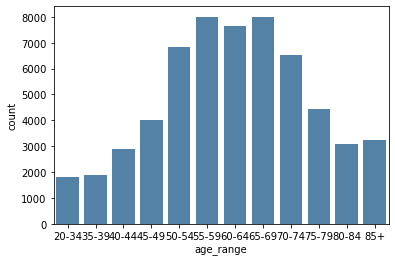

In [45]:
sns.countplot(data = df, x = 'age_range', color = 'SteelBlue')

In [46]:
bins = [0, 1, 7, 12, 17, 22, 30, 60, 90, 1000]
names = ['0', '1-7', '8-12', '13-17', '18-22', '23-30', '31-60','61-90', '91+']

df['tum_afm_range'] = pd.cut(df['tum_afm'], bins, labels=names)

<AxesSubplot:xlabel='tum_afm_range', ylabel='count'>

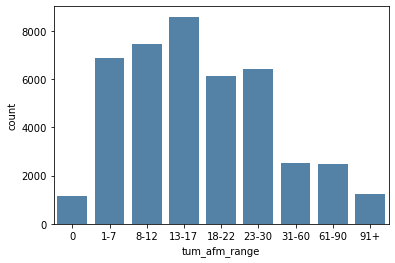

In [47]:
sns.countplot(data = df, x = 'tum_afm_range', color = 'SteelBlue')

In [48]:
df.head()

,leeft,incjr,vit_stat,vit_stat_int,tumsoort,diag_basis,topo_sublok,later,morf,gedrag,...,meta_rt,meta_chir,survival_5Y,years_after_diagnosis,exp_life,stadiumtot,pos_lymf_range,pos_lymf_ind,age_range,tum_afm_range
0,93,2013,1,390,501300,7,C508,1.0,8500,3,...,0.0,0.0,0.0,1.0,1.0,1,Negative,0,85+,23-30
1,60,2010,0,3592,503200,2,C505,1.0,8520,2,...,0.0,0.0,1.0,NaN,NaN,2,Negative,0,60-64,18-22
2,43,2010,0,4011,502200,7,C508,2.0,8500,2,...,0.0,0.0,1.0,NaN,NaN,0,Negative,0,40-44,18-22
3,38,2012,0,2811,501300,7,C504,1.0,8481,3,...,0.0,0.0,1.0,NaN,NaN,1,Negative,0,35-39,8-12
4,29,2019,0,724,501300,7,C504,2.0,8500,3,...,0.0,0.0,NaN,1.0,NaN,1,Negative,0,20-34,18-22


<a id='stadord'></a>
### Creation of ordinal features describing stadium

A distinct group of features describe stadium of the cancer, based on so called TNM 8 classification:

https://richtlijnendatabase.nl/richtlijn/borstkanker/tnm_8.html

The group consists of the following features: 'ct', 'cn', 'cm', 'pt', 'pn', 'pm', 'stadium', 'cstadium', 'pstadium'. 
They can be treated both as categorical and as ordinal features. In order to treat them as ordinal, it is necessary to assign them numeric values. This will be done using dictionaries as defined in the below section. These assignments are rudimentary and in the future would need to be validated by consulting domain experts.
The newly created ordinal features shall be named after an original categorical feature with underscore "ord" suffix.

In [49]:
dic = {'0': 0, '1': 1, '1A': 1, '1B': 2, '2A':3, '2B':4, '3A':5, '3B':6, '3C':7, '4':8, 'M':9, 'unknown': np.nan}

In [50]:
df['stadium_ord'] = df['stadium'].map(dic)
df['stadium_ord'] = df['stadium_ord'].astype(float)

In [51]:
df['cstadium_ord'] = df['cstadium'].map(dic)
df['cstadium_ord'] = df['cstadium_ord'].astype(float)

In [52]:
df['pstadium_ord'] = df['pstadium'].map(dic)
df['pstadium_ord'] = df['pstadium_ord'].astype(float)

Additonal dictionaries will be used to create the ordinal versions of ct (ct_ord) and pt (pt_ord), called dict_ct. For ordinal version of pn (pn_ord), dictionary dict_pn will be used. For ordinal version of cn (cn_ord), dictionary dic will be applied. For cm and pm, existing numeric values will stay (0, 1 or nan)

In [53]:
df['cn_ord'] = df['cn'].map(dic)
df['cn_ord'] = df['cn_ord'].astype(float)

In [54]:
dic_ct = {'0':0, 'IS':1, '1':3, '1M': 8, '1A':3, '1B': 4, '1C': 5, '2':6, '3':7, '4A':8, '4B':9, '4C':10, '4D':11, 
          'unknown':np.nan}

In [55]:
df['ct_ord'] = df['ct'].map(dic_ct)
df['ct_ord'] = df['ct_ord'].astype(float)

In [56]:
df['pt_ord'] = df['pt'].map(dic_ct)
df['pt_ord'] = df['pt_ord'].astype(float)

In [57]:
dic_pn = {'0':0, '0S':0, '0I':0, '0IS': 0, '1M':1, '1MS':1, '1A':2, '1AS':2, '1B': 3, '1BS':3, '1C': 4, '1CS':4,  
          '2A':5, '2AS':5, '2B':6, '3A':7, '3B':8, '3C':9, 'unknown':np.nan}

In [58]:
df['pn_ord'] = df['pn'].map(dic_pn)
df['pn_ord'] = df['pn_ord'].astype(float)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58377 entries, 0 to 59999
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   leeft                  58377 non-null  int64   
 1   incjr                  58377 non-null  int64   
 2   vit_stat               58377 non-null  int64   
 3   vit_stat_int           58377 non-null  int64   
 4   tumsoort               58377 non-null  category
 5   diag_basis             58377 non-null  category
 6   topo_sublok            58377 non-null  category
 7   later                  57071 non-null  category
 8   morf                   58377 non-null  category
 9   gedrag                 58377 non-null  int64   
 10  diffgrad               49392 non-null  float64 
 11  ct                     57506 non-null  category
 12  cn                     57540 non-null  category
 13  cm                     55905 non-null  float64 
 14  pt                     52809 non-null 

<a id='expl'></a>
### Data exploration

<a id='age'></a>
#### Age, vital status and time since incident

Let's visualize correlations between variables describing the vital status of the patients:
- age ('leeft')
- vital status ('vit_stat')
- time (in days) since the incidence until recording the status ('vit_stat_int')

<AxesSubplot:xlabel='vit_stat_int', ylabel='leeft'>

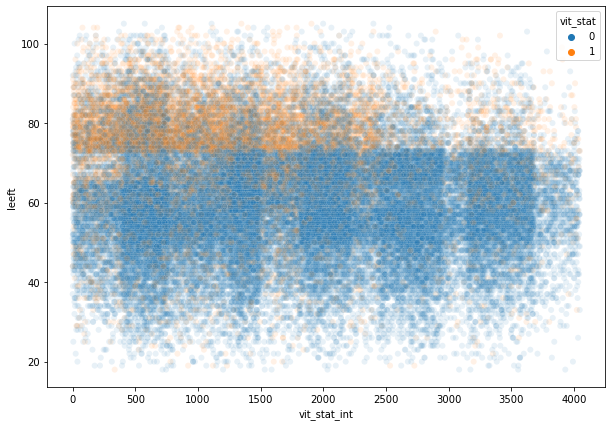

In [60]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df, x = 'vit_stat_int', y = 'leeft', hue = 'vit_stat', alpha = 0.1)

We can see that distribution of the variables `leeft` and `vit_stat_int` is not entirely random. One can see a horizontal border at `leeft` of around 73, below which the density of `vit_stat` of 1 is significantly higher, and above which that of `vit_stat` of 0. There seem to be also vertical "belts" of higher density of `vit_stat` 0 points.

<AxesSubplot:xlabel='vit_stat_int', ylabel='leeft'>

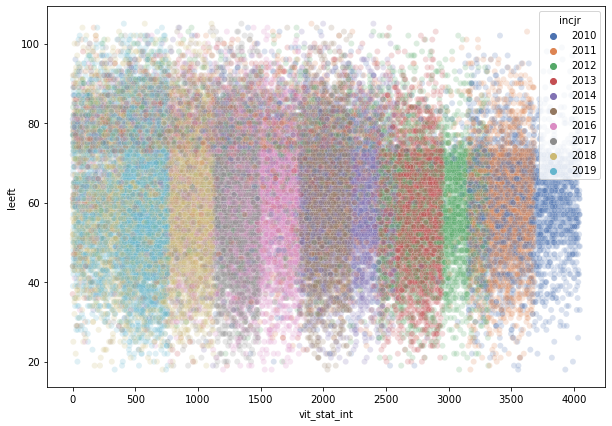

In [61]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df, x = 'vit_stat_int', y = 'leeft', hue = 'incjr', alpha = 0.2, palette = 'deep')

In [62]:
#plt.figure(figsize = (10,7))
#sns.scatterplot(data = df, x = 'vit_stat_int', y = 'leeft', hue = 'survival_5Y', alpha = 0.2)

<AxesSubplot:xlabel='incjr', ylabel='count'>

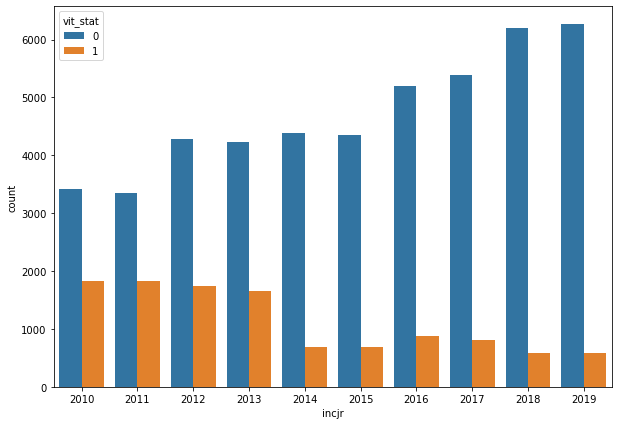

In [63]:
plt.figure(figsize = (10,7))
sns.countplot(x='incjr', hue="vit_stat", data=df)

The plots with vit_stat as hue show that the proportion of "1" values decreases by year. This is logical, because the proportion of deceased patients increases.

As the following step, we shall prepare the dataset for analysing the 5 year survival rate. First, let's visualize this variable as hue in countplot by year.

<AxesSubplot:xlabel='incjr', ylabel='count'>

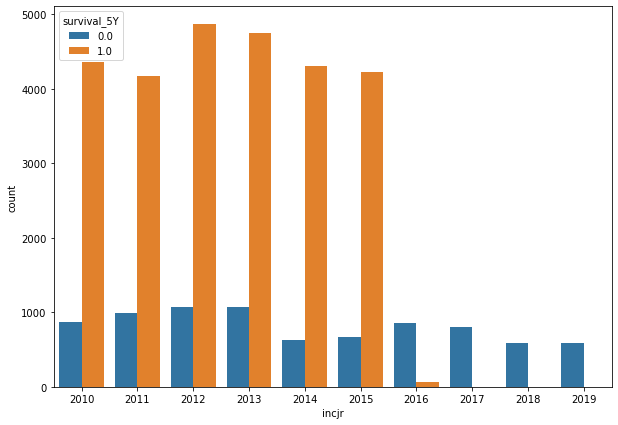

In [64]:
plt.figure(figsize = (10,7))
sns.countplot(x='incjr', hue="survival_5Y", data=df)

For the analysis of 5 year survival rate, only occurances for which the the outcome after 5 years in known, can be taken into account. Therefore, years 2016 and beyond will be excluded in a dedicated slice of the dataset - df_sr. Also, all records with unknown 5Y survival shall be removed. 

In [65]:
df_sr = df.loc[df['incjr'] < 2016].copy()

In [66]:
df_sr = df_sr.drop(df_sr.loc[df_sr['survival_5Y'] == np.nan].index)

In [67]:
df_sr.head()

,leeft,incjr,vit_stat,vit_stat_int,tumsoort,diag_basis,topo_sublok,later,morf,gedrag,...,pos_lymf_ind,age_range,tum_afm_range,stadium_ord,cstadium_ord,pstadium_ord,cn_ord,ct_ord,pt_ord,pn_ord
0,93,2013,1,390,501300,7,C508,1.0,8500,3,...,0,85+,23-30,1.0,1.0,1.0,0.0,5.0,5.0,NaN
1,60,2010,0,3592,503200,2,C505,1.0,8520,2,...,0,60-64,18-22,4.0,1.0,NaN,0.0,5.0,NaN,NaN
2,43,2010,0,4011,502200,7,C508,2.0,8500,2,...,0,40-44,18-22,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,38,2012,0,2811,501300,7,C504,1.0,8481,3,...,0,35-39,8-12,1.0,1.0,1.0,0.0,4.0,5.0,0.0
7,57,2015,0,2104,503200,6,C504,2.0,8260,2,...,0,55-59,91+,9.0,8.0,NaN,0.0,10.0,NaN,NaN


In [68]:
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32460 entries, 0 to 59999
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   leeft                  32460 non-null  int64   
 1   incjr                  32460 non-null  int64   
 2   vit_stat               32460 non-null  int64   
 3   vit_stat_int           32460 non-null  int64   
 4   tumsoort               32460 non-null  category
 5   diag_basis             32460 non-null  category
 6   topo_sublok            32460 non-null  category
 7   later                  31744 non-null  category
 8   morf                   32460 non-null  category
 9   gedrag                 32460 non-null  int64   
 10  diffgrad               27491 non-null  float64 
 11  ct                     31975 non-null  category
 12  cn                     31999 non-null  category
 13  cm                     31132 non-null  float64 
 14  pt                     29339 non-null 

In [69]:
df_sr.describe()

,leeft,incjr,vit_stat,vit_stat_int,gedrag,diffgrad,cm,pm,ond_lymf,pos_lymf,...,years_after_diagnosis,exp_life,pos_lymf_ind,stadium_ord,cstadium_ord,pstadium_ord,cn_ord,ct_ord,pt_ord,pn_ord
count,32460.000000,32460.000000,32460.000000,32460.000000,32460.000000,27491.000000,31132.00000,2936.000000,31801.000000,29583.000000,...,13014.000000,8439.000000,32460.000000,32290.000000,31829.000000,29454.000000,31999.000000,31975.000000,29339.000000,28132.000000
mean,62.313278,2012.479544,0.259982,2410.680314,2.881269,2.061220,0.05406,0.630450,4.759127,1.039685,...,3.865299,3.940988,0.362415,2.571601,2.259637,2.274869,0.275915,4.754214,4.570401,0.904948
std,14.015538,1.668325,0.438631,841.905773,0.323476,0.734039,0.22614,0.482765,9.627893,3.817065,...,1.572033,2.548989,0.480705,2.202098,2.161742,2.087798,0.867800,2.092555,1.928041,1.735074
min,18.000000,2010.000000,0.000000,0.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,2011.000000,0.000000,1948.000000,3.000000,2.000000,0.00000,0.000000,1.000000,0.000000,...,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,4.000000,0.000000
50%,63.000000,2012.000000,0.000000,2450.000000,3.000000,2.000000,0.00000,1.000000,2.000000,0.000000,...,5.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.000000,5.000000,0.000000
75%,72.000000,2014.000000,1.000000,3050.000000,3.000000,3.000000,0.00000,1.000000,4.000000,1.000000,...,5.000000,6.000000,1.000000,4.000000,4.000000,4.000000,0.000000,6.000000,6.000000,2.000000
max,105.000000,2015.000000,1.000000,4047.000000,3.000000,3.000000,1.00000,1.000000,97.000000,97.000000,...,5.000000,11.000000,1.000000,9.000000,9.000000,9.000000,7.000000,11.000000,11.000000,9.000000


<AxesSubplot:xlabel='incjr', ylabel='count'>

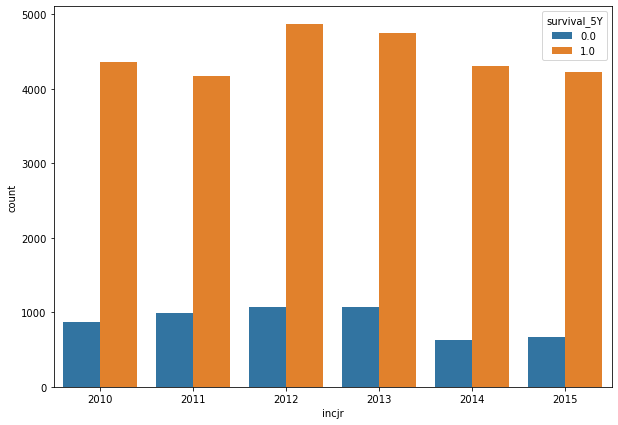

In [70]:
plt.figure(figsize = (10,7))
sns.countplot(x='incjr', hue="survival_5Y", data=df_sr)

<a id='num'></a>
#### Numeric features

For the EDA, let us return to the original full dataset, df, and visualize main characteristics of the dataset.

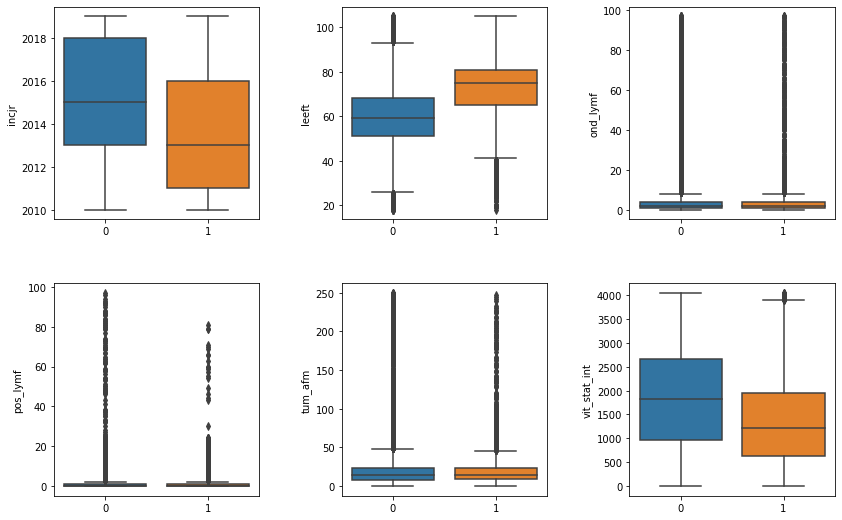

In [71]:
fig, ax = plt.subplots(2, 3, figsize=(14,9), gridspec_kw={'hspace': 0.3})
for i, col in enumerate(df[numeric_features].columns.difference(['vit_stat'])):
    _ax=ax[i // 3, i % 3]
    sns.boxplot(y=col, x="vit_stat", data=df, ax=_ax)
    _ax.set_xlabel(None)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

<AxesSubplot:xlabel='ond_lymf', ylabel='Count'>

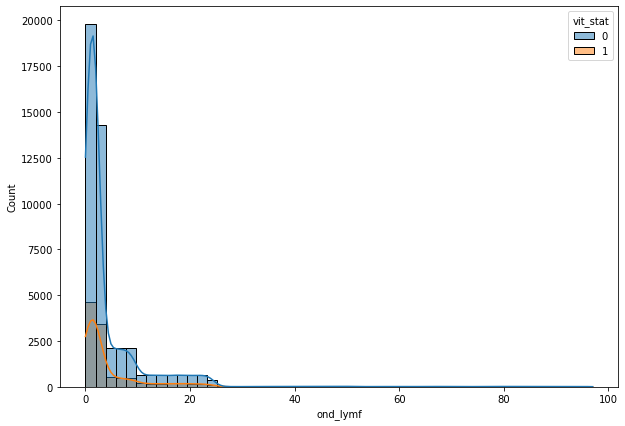

In [72]:
plt.figure(figsize = (10,7))
sns.histplot(data = df, x = 'ond_lymf', hue = 'vit_stat', bins = 50, kde = True)

<AxesSubplot:xlabel='pos_lymf', ylabel='Count'>

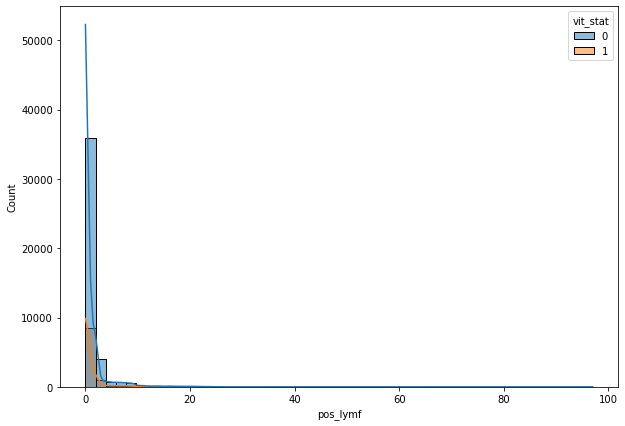

In [73]:
plt.figure(figsize = (10,7))
sns.histplot(data = df, x = 'pos_lymf', hue = 'vit_stat', bins = 50, kde = True)

In [74]:
dftemp = pd.concat([df[numeric_features], df['vit_stat']], axis = 1) # select numeric features to show on pairplot

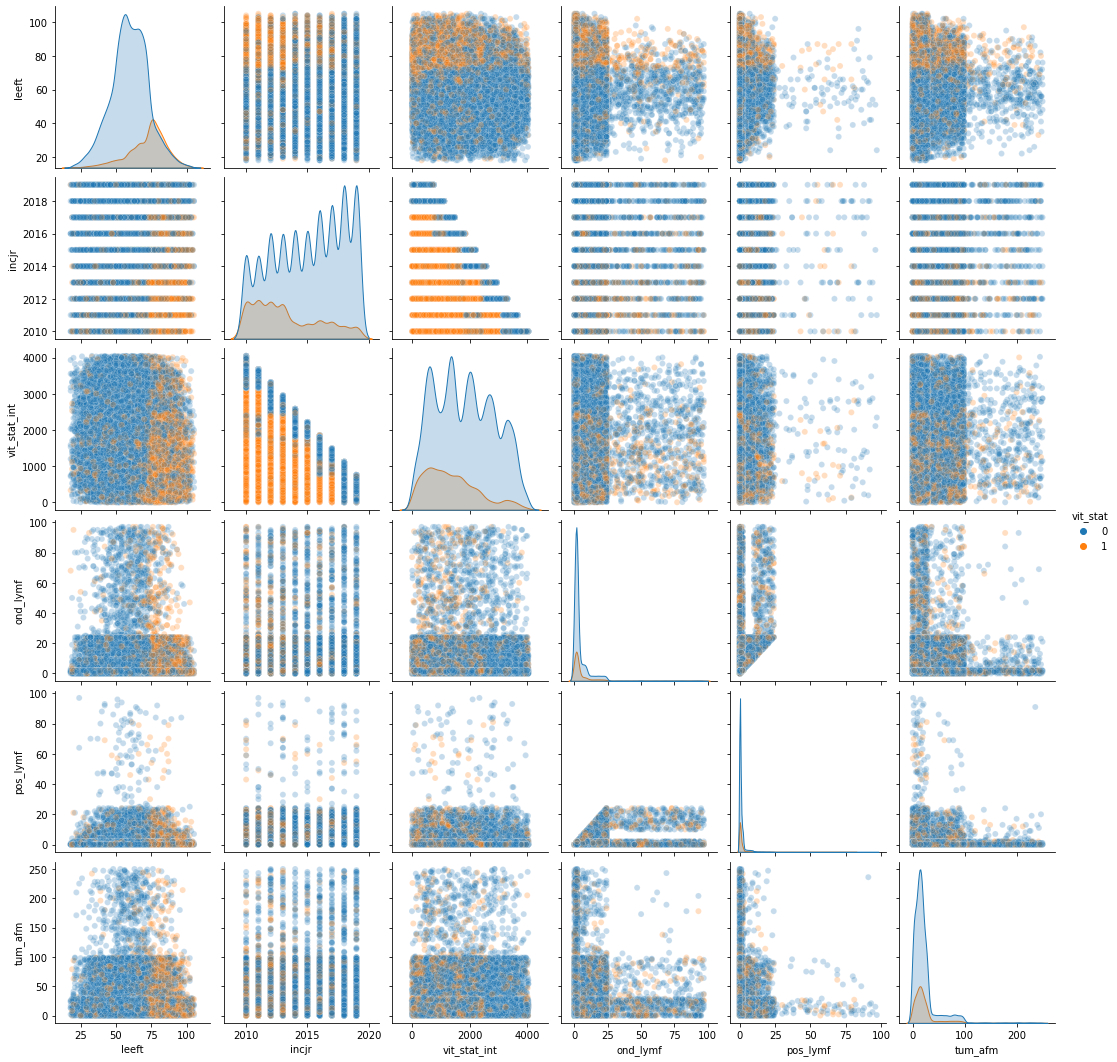

In [75]:
sns.pairplot(data = dftemp, hue = 'vit_stat', plot_kws={'alpha':0.25})

Patterns observed in the pairplot show clearly non random character, with distinct zones of higher and lower density of data points. It should be clarified if this behavior is the effect of synthetic data generation, and whether it has any distorting effect.  

<a id='ord'></a>
#### Ordinal features - cancer stadium

Let's examine correlations between cancer stadium variables, which illustrate the stadium of cancer established by various methodologies. Examples of such variables are stadium_ord, ct_ord, cn_ord and pn_ord. 

In [76]:
stadord = df.groupby(['stadium_ord']).mean().reset_index()
stadord

,stadium_ord,leeft,incjr,vit_stat,vit_stat_int,gedrag,diffgrad,cm,pm,ond_lymf,...,survival_5Y,years_after_diagnosis,exp_life,pos_lymf_ind,cstadium_ord,pstadium_ord,cn_ord,ct_ord,pt_ord,pn_ord
0,0.0,59.768773,2014.865795,0.071750,1851.207988,2.000000,2.292844,0.045420,0.652381,3.245887,...,0.911829,2.698402,4.078947,0.332607,0.089151,0.185303,0.124542,1.306210,1.187609,0.265699
1,1.0,62.145498,2014.740624,0.208473,1729.494339,3.000000,1.961577,0.007542,0.670181,3.217050,...,0.750623,2.626737,3.251591,0.324430,1.159472,1.276585,0.058766,4.566771,4.604663,0.128126
2,2.0,61.117841,2014.770244,0.199473,1749.258723,2.970375,2.031442,0.194751,0.915094,4.994591,...,0.766376,2.675147,3.323432,0.370639,2.979094,3.098749,0.401235,5.122962,4.986157,1.414483
3,3.0,61.945809,2014.675735,0.210376,1741.939861,2.987333,2.085963,0.006903,0.583784,5.314705,...,0.746676,2.635425,3.173298,0.381320,2.860754,3.182851,0.242852,5.524261,5.448559,1.035304
4,4.0,62.072594,2014.690354,0.207270,1742.366802,2.987080,2.077905,0.005975,0.626204,5.253974,...,0.753608,2.591559,3.260433,0.376547,2.852781,3.184343,0.241299,5.520306,5.453006,1.045258
5,5.0,62.903890,2014.662243,0.213272,1747.416934,3.000000,2.152370,0.019807,0.576177,7.698960,...,0.744411,2.578874,3.221030,0.444394,4.084668,5.100604,0.774357,5.882623,5.261284,3.649077
6,6.0,62.163777,2014.739964,0.224909,1721.565693,3.000000,2.156045,0.023889,0.563307,7.547586,...,0.727136,2.625586,3.249493,0.427007,4.037409,5.151362,0.787254,5.886239,5.394644,3.540811
7,7.0,62.620705,2014.704792,0.213834,1741.998644,3.000000,2.116212,0.024774,0.573460,7.395005,...,0.758468,2.691639,3.412262,0.421790,3.938517,5.150896,0.679673,5.827132,5.297767,3.526618
8,8.0,61.713242,2014.720548,0.197260,1730.778995,2.882192,2.130332,0.918534,0.561047,10.597679,...,0.770769,2.575549,3.305556,0.475799,8.162557,2.690418,1.852211,6.565840,4.277405,1.651613
9,9.0,62.087674,2014.751736,0.210069,1740.156250,2.883681,2.101136,0.910959,0.566489,10.230203,...,0.749632,2.538562,3.342975,0.436632,8.072917,2.927438,1.815005,6.527552,4.181443,1.645749


<AxesSubplot:xlabel='stadium_ord', ylabel='ct_ord'>

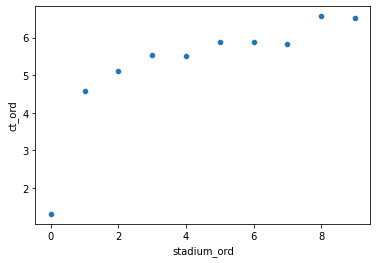

In [77]:
sns.scatterplot(data = stadord, x = 'stadium_ord', y = 'ct_ord', alpha = 1)

<AxesSubplot:xlabel='stadium_ord', ylabel='cn_ord'>

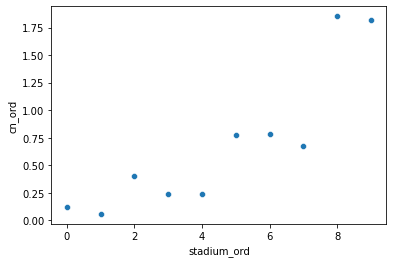

In [78]:
sns.scatterplot(data = stadord, x = 'stadium_ord', y = 'cn_ord', alpha = 1)

<AxesSubplot:xlabel='stadium_ord', ylabel='pn_ord'>

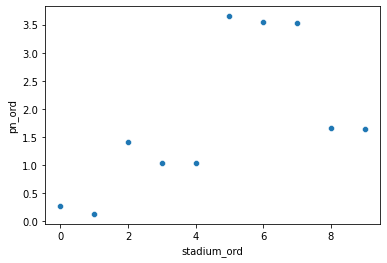

In [79]:
sns.scatterplot(data = stadord, x = 'stadium_ord', y = 'pn_ord', alpha = 1)

As can be seen, there are approximately linear correlations between stadium_ord and the other variables, which is as could be expected.

<a id='ordnum'></a>
#### Correlation matrix

In [80]:
df_sr1 = df_sr[['leeft', 'incjr', 'vit_stat', 'vit_stat_int', 'gedrag', 'diffgrad', 'cm',
       'pm', 'ond_lymf', 'pos_lymf', 'er_stat', 'pr_stat', 'her2_stat', 'dcis_comp', 'multifoc',
       'tum_afm', 'swk', 'swk_uitslag', 'mari', 'mari_uitslag', 'okd',
       'org_chir', 'dir_reconstr', 'rt', 'meta_rt', 'meta_chir', 'survival_5Y', 'pos_lymf_ind',
       'stadium_ord', 'cstadium_ord', 'pstadium_ord', 'cn_ord', 'ct_ord', 'pt_ord', 'pn_ord']].copy()

In [81]:
corr_matrix = df_sr1.corr()
corr_matrix

,leeft,incjr,vit_stat,vit_stat_int,gedrag,diffgrad,cm,pm,ond_lymf,pos_lymf,...,meta_chir,survival_5Y,pos_lymf_ind,stadium_ord,cstadium_ord,pstadium_ord,cn_ord,ct_ord,pt_ord,pn_ord
leeft,1.000000,-0.041674,0.403180,-0.283340,0.051518,0.012424,0.013779,-0.020193,0.006499,-0.002149,...,-0.002735,-0.334767,0.014828,0.020004,0.022714,0.008668,0.003633,0.031519,0.027234,0.007713
incjr,-0.041674,1.000000,-0.184646,-0.438371,0.006860,0.002385,-0.006168,-0.027681,0.007754,-0.001089,...,0.005511,0.042868,-0.006122,-0.006784,-0.002483,0.001578,-0.000942,0.002334,0.003446,-0.000647
vit_stat,0.403180,-0.184646,1.000000,-0.555854,0.132878,-0.010555,0.012951,0.014388,0.010530,0.003761,...,-0.004184,-0.744239,0.012942,0.055733,0.051927,0.050892,0.006365,0.072852,0.077181,0.022084
vit_stat_int,-0.283340,-0.438371,-0.555854,1.000000,-0.109281,0.005655,-0.005259,0.000419,-0.013777,-0.002428,...,0.003152,0.732826,-0.009952,-0.036690,-0.039301,-0.037693,-0.008949,-0.058743,-0.061089,-0.019942
gedrag,0.051518,0.006860,0.132878,-0.109281,1.000000,-0.112708,-0.017494,0.014963,0.043977,0.019176,...,0.007186,-0.108439,0.022933,0.365510,0.311963,0.352097,0.035792,0.550743,0.604606,0.113182
diffgrad,0.012424,0.002385,-0.010555,0.005655,-0.112708,1.000000,0.018979,-0.000114,0.023892,0.008044,...,0.011323,0.004527,0.010397,0.034365,0.071453,0.017865,0.036600,0.020450,-0.056893,0.044010
cm,0.013779,-0.006168,0.012951,-0.005259,-0.017494,0.018979,1.000000,-0.050950,0.119321,0.072771,...,0.064093,-0.009441,0.036753,0.387576,0.504899,0.041890,0.303070,0.091607,-0.053093,0.056843
pm,-0.020193,-0.027681,0.014388,0.000419,0.014963,-0.000114,-0.050950,1.000000,0.004779,-0.035304,...,-0.024323,-0.002094,-0.010906,-0.120326,0.059225,0.322378,0.035551,0.071481,-0.092332,0.001739
ond_lymf,0.006499,0.007754,0.010530,-0.013777,0.043977,0.023892,0.119321,0.004779,1.000000,0.487877,...,0.011973,-0.013761,0.247842,0.195072,0.255901,0.120438,0.293327,0.143204,0.056430,0.106014
pos_lymf,-0.002149,-0.001089,0.003761,-0.002428,0.019176,0.008044,0.072771,-0.035304,0.487877,1.000000,...,0.018882,-0.002847,0.415667,0.100562,0.132184,0.052933,0.206264,0.065598,0.019317,0.049549


<AxesSubplot:>

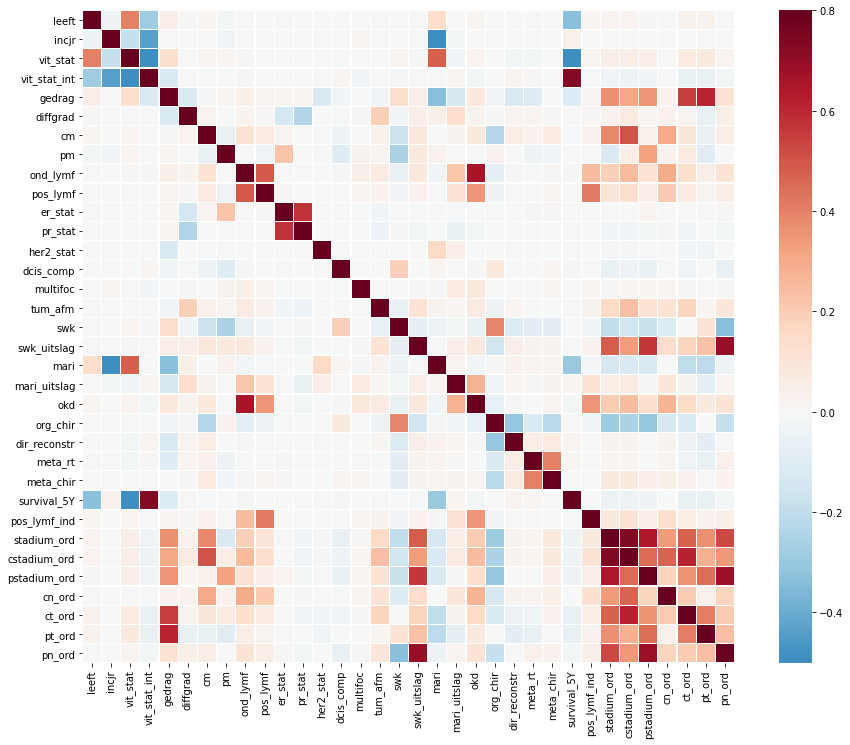

In [82]:
plt.figure(figsize=(16,12))
sns.heatmap(data = df_sr1.corr(), annot = False, cmap = 'RdBu_r', linewidths=.2, square=True, vmax=0.8, vmin = -0.5, center = 0)

In [83]:
corr_matrix = df_sr1.corr().sort_values(by = 'survival_5Y', ascending = False).transpose()
corr_matrix = corr_matrix.sort_values(by = 'survival_5Y', ascending = False)

<AxesSubplot:>

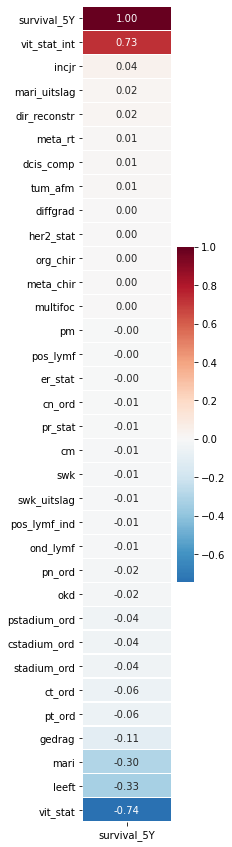

In [84]:
plt.figure(figsize = (2,15))
sns.heatmap(data = corr_matrix[['survival_5Y']], 
            annot = True, fmt='.2f', cmap = 'RdBu_r', linewidths=.1, square=False, vmax=1, center = 0)

Apparently, the 5Y survival rate is only weakly correlated with clinical features:
mari procedure (0.30)
cancer behavior (in situ vs malignant) (0.11)

Correlation with other clinical features is weak / non existent. This is the key issue to be explained

<a id='cat'></a>
#### Categorical features

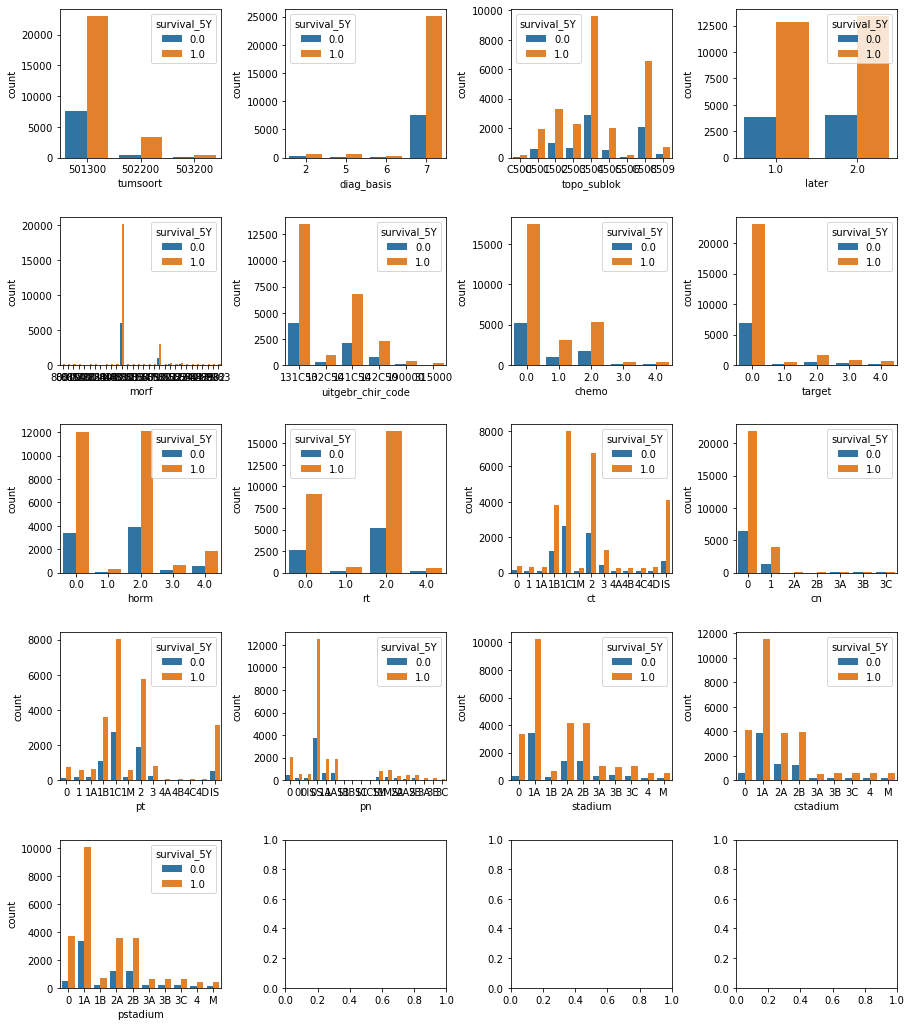

In [85]:
fig, ax = plt.subplots(5, 4, figsize=(15,18))
for i, col in enumerate(categorical_features):
    _ax=ax[i // 4, i % 4]
    sns.countplot(x=col, hue="survival_5Y", data=df, ax=_ax)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

From the countplots, one cannot see clear correlations between any of the categorical features and the 5 year survival rate. For more explicit visualization, let's create barplots of 5Y survival rate as function of individual features. Note the limits of y axis have been set to 0.5 - 1.0, for differences to appear bigger.

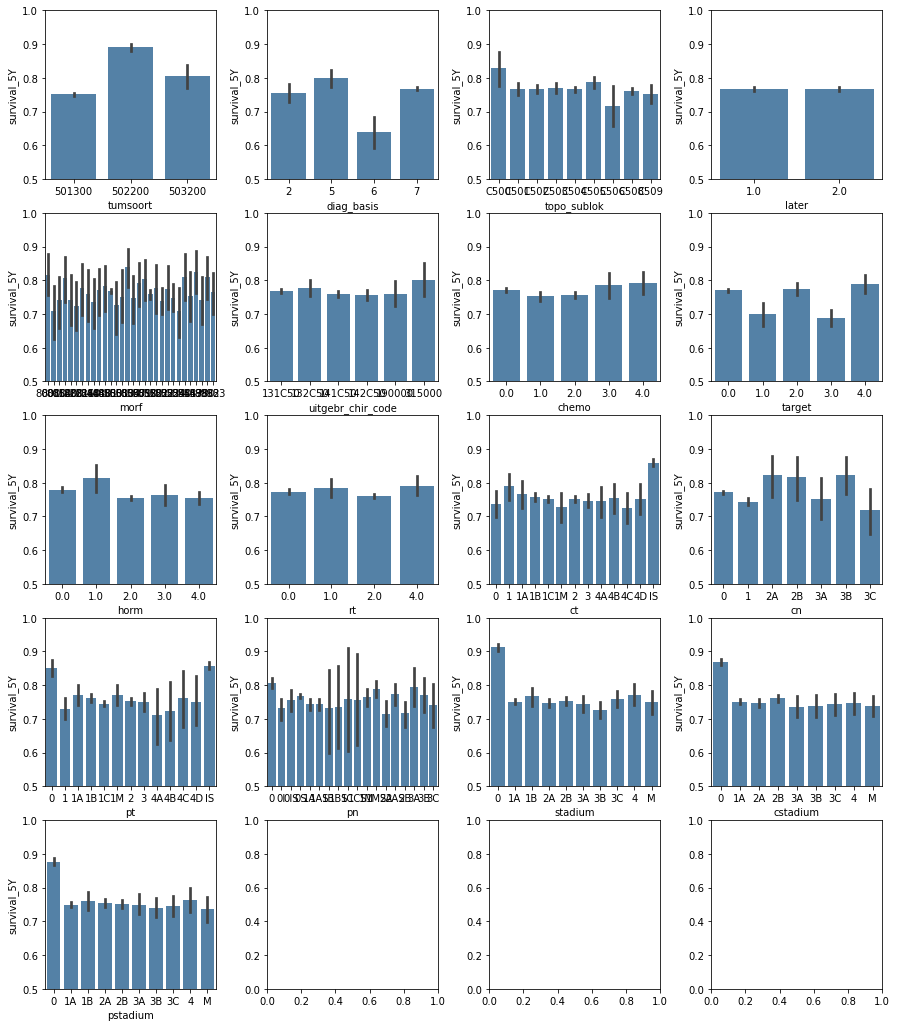

In [86]:
fig, ax = plt.subplots(5, 4, figsize=(15,18))
for i, col in enumerate(categorical_features):
    _ax=ax[i // 4, i % 4]
    _ax.set_ylim(0.5, 1)
    sns.barplot(x=col, y="survival_5Y", data=df, ax=_ax, color = 'SteelBlue')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

Some significant correlations can be seen for tum_soort and diag_basis. For stadium features, 5Y survival is higher for the value of 0, otherwise there does not to be a strong correlations. Overall, few strong patterns can be observed.

<a id='other'></a>
#### Other correlations

Correlation between cancer stadium and the number of positive lymph nodes is expected to exist. 

In [87]:
df_stadium = df.groupby('stadiumtot').mean()
df_stadium

,leeft,incjr,vit_stat,vit_stat_int,gedrag,diffgrad,cm,pm,ond_lymf,pos_lymf,...,years_after_diagnosis,exp_life,pos_lymf_ind,stadium_ord,cstadium_ord,pstadium_ord,cn_ord,ct_ord,pt_ord,pn_ord
stadiumtot,,,,,,,,,,,,,,,,,,,,,
0,59.768773,2014.865795,0.071750,1851.207988,2.000000,2.292844,0.045420,0.652381,3.245887,0.794990,...,2.698402,4.078947,0.332607,0.000000,0.089151,0.185303,0.124542,1.306210,1.187609,0.265699
1,62.080809,2014.742489,0.207907,1730.738469,2.998135,1.965866,0.019297,0.717497,3.328109,0.768826,...,2.629778,3.255930,0.327338,1.062948,1.271084,1.396013,0.079640,4.601168,4.629726,0.211986
2,62.009389,2014.683066,0.208818,1742.153964,2.987206,2.081901,0.006438,0.604283,5.284224,1.093377,...,2.613517,3.216671,0.378926,3.501483,2.856760,3.183603,0.242073,5.522278,5.450796,1.040303
3,62.562604,2014.702383,0.217332,1736.997875,3.000000,2.141306,0.022836,0.570940,7.546093,1.638108,...,2.632708,3.293994,0.431021,6.004098,4.019882,5.134326,0.746837,5.865194,5.317635,3.571979
4,61.713242,2014.720548,0.197260,1730.778995,2.882192,2.130332,0.918534,0.561047,10.597679,2.126747,...,2.575549,3.305556,0.475799,8.000000,8.162557,2.690418,1.852211,6.565840,4.277405,1.651613
M,62.087674,2014.751736,0.210069,1740.156250,2.883681,2.101136,0.910959,0.566489,10.230203,2.268012,...,2.538562,3.342975,0.436632,9.000000,8.072917,2.927438,1.815005,6.527552,4.181443,1.645749


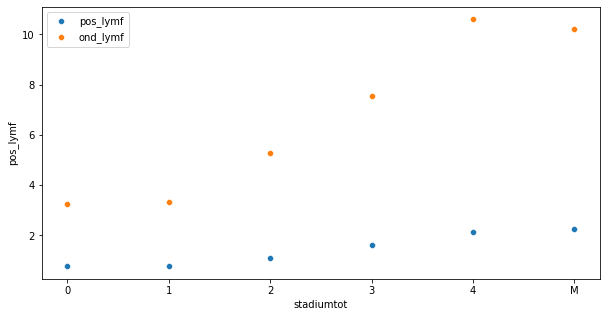

In [88]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df_stadium, x = df_stadium.index, y = df_stadium['pos_lymf'], label = 'pos_lymf')
sns.scatterplot(data = df_stadium, x = df_stadium.index, y = df_stadium['ond_lymf'], label = 'ond_lymf')
plt.legend()

The expected correlation can be observed.

Both datasets, full one and the one dedicated to 5Y survival rates, will be exported to separate csv files.

In [89]:
df.to_csv('Breast_cancer_transformed.csv', encoding='utf-8', index=False)

In [90]:
df_sr.to_csv('Breast_cancer_transformed_sr.csv', encoding='utf-8', index=False)